In [1]:
import uproot
import numpy as np
import tqdm
import glob
import os
from natsort import natsorted
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
# from pyjet import cluster
# from pyjet.testdata import get_event
from numpy.lib.recfunctions import append_fields
import calc
svj_path = "/home/tfaucett/Projects/svj-production"

## Mjj plot

In [24]:
root_files = glob.glob(f"{svj_path}/data/root_files/*.root")
for root_file in root_files:
    events = uproot.open(root_file)["Delphes"]
    branches = ["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"]
    jets = events.arrays(branches=branches, outputtype=pd.DataFrame, flatten=True)
    jets.columns = jets.columns.str.lower().str.replace("jet.", "")
    file_name = os.path.basename(root_file).split(".root")[0]
    minv_file = f"data/minv/{file_name}.feather"
    minvs = []
    for idx, entry in tqdm(jets.groupby("entry")):
        # Gaurantee we have at least 2 jets
        if len(entry) >= 2:
            j1 = entry.iloc[0]
            j2 = entry.iloc[1]
            abs_eta = np.absolute(j1.eta - j2.eta)
            # Only calculate minv if jets meet pT/eta cut
            if j1.pt > 440 and j2.pt > 60 and abs_eta <= 1.2:
                minv = calc.mass_inv(j1, j2)
                minvs.append(minv)
    df = pd.DataFrame({"minv":minvs})
    df.to_feather(minv_file)
    

100%|██████████| 14490/14490 [00:03<00:00, 4569.20it/s]


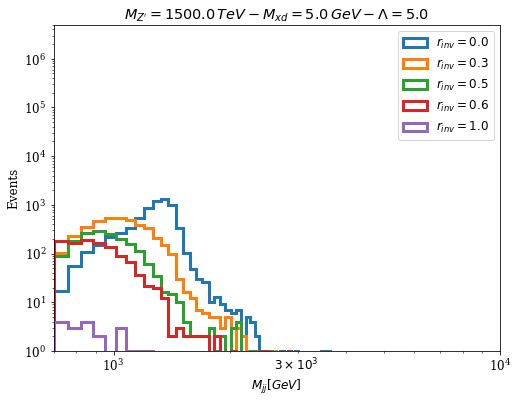

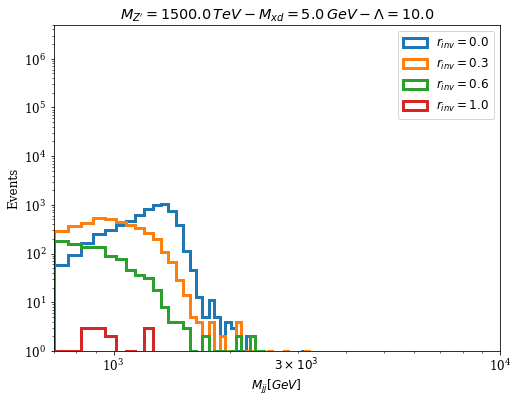

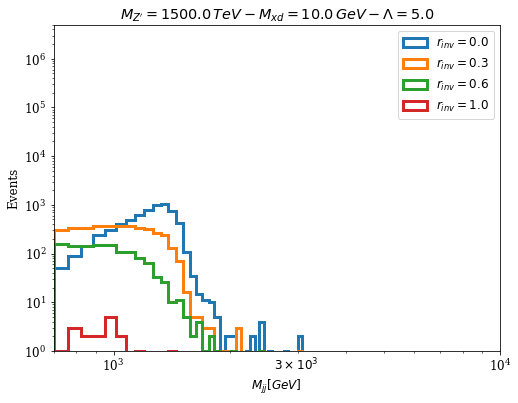

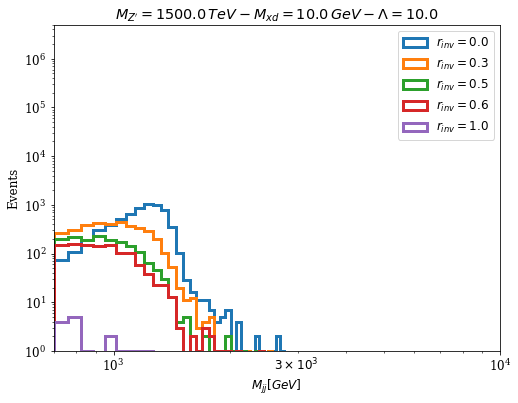

In [45]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 12})
lb, ub, n_bins = 7e2, 1e4, 150

mxds = ["5p0", "10p0"]
lams = ["5p0", "10p0"]

density = False
for mxd in mxds:
    for lam in lams:
        plt.figure(figsize=(8, 6))
        minv_files = natsorted(glob.glob("data/minv/*_mXd_%s_*_lam_%s.feather" %(mxd, lam)))
        for file in minv_files:
            X = pd.read_feather(file).minv
            deets = os.path.basename(file).split("_")
            mZ = deets[4].replace("p", ".")
            mXd = deets[6].replace("p", ".")
            rinv = deets[8].replace("p", ".")
            lam = deets[-1].split(".")[0].replace("p", ".")
            label = "$r_{inv}=%s$" %(rinv)
            bins = np.linspace(lb, ub, n_bins)
            plt.hist(X, bins=bins, histtype="step", density=density, label=label, linewidth=3)
        plt.yscale("log")
        plt.xscale("log")
        plt.xlim([lb, ub])
        if density:
            plt.ylim([1e-6, 1e0])
        else:
            plt.ylim([1e0, 5e6])
            plt.text(2.6e3, 4e-1, "$3\\times10^3$")
        plt.xlabel("$M_{jj} [GeV]$")
        plt.ylabel("Events")
        plt.title("$M_{Z'}=%s\, TeV - M_{xd}=%s\, GeV - \Lambda=%s$" %(mZ, mXd, lam))
        plt.legend()
        plt.savefig("figures/Mjj_mXd_%s_lam_%s.png" %(mXd, lam))
        plt.show()

## MET Plt

100%|██████████| 5/5 [00:00<00:00,  8.15it/s]


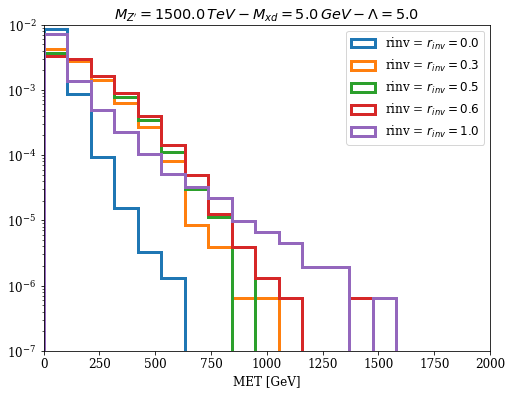

100%|██████████| 4/4 [00:00<00:00,  8.80it/s]


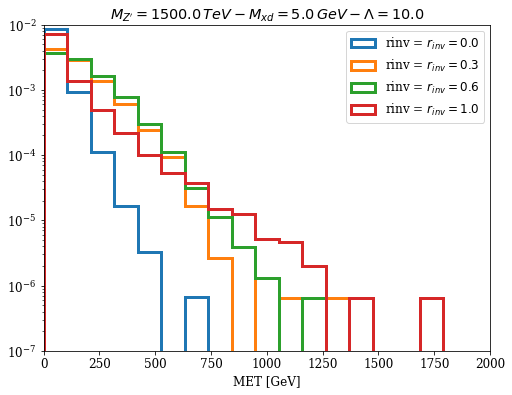

100%|██████████| 4/4 [00:00<00:00,  9.50it/s]


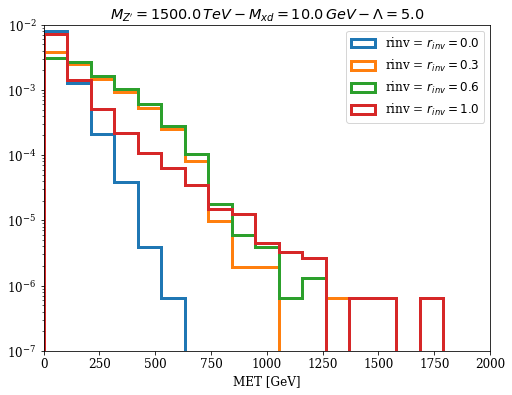

100%|██████████| 5/5 [00:00<00:00,  9.40it/s]


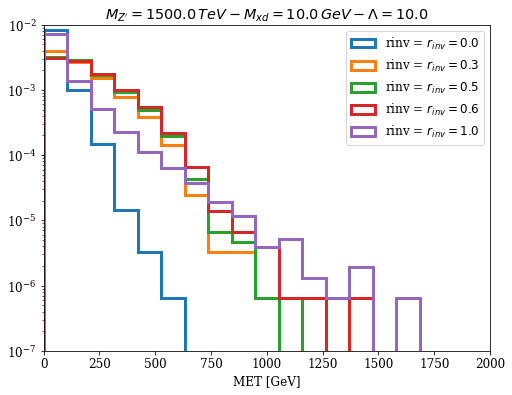

In [46]:
root_files = glob.glob(f"{svj_path}/data/root_files/CMS*.root")
bins = np.linspace(0, 2000, 20)
plt.rcParams.update({'font.size': 12})
mxds = ["5p0", "10p0"]
lams = ["5p0", "10p0"]

for mxd in mxds:
    for lam in lams:
        plt.figure(figsize=(8, 6))
        root_files = natsorted(glob.glob("%s/data/root_files/*_mXd_%s_*_lam_%s.root" %(svj_path, mxd, lam)))   
        for root_file in tqdm(root_files):
            events = uproot.open(root_file)["Delphes"]
            branches = ["MissingET.MET"]
            MET = events.arrays(branches=branches, outputtype=pd.DataFrame, flatten=True)
            deets = os.path.basename(root_file).split("_")
            mZ = deets[4].replace("p", ".")
            mXd = deets[6].replace("p", ".")
            rinv = deets[8].replace("p", ".")
            lam = deets[-1].split(".")[0].replace("p", ".")
            label = "$r_{inv}=%s$" %rinv
            plt.hist(MET.values, bins=bins, histtype="step", density=True, label=f"rinv = {label}", linewidth=3)
        plt.xlim([0, 2000])
        plt.yscale("log")
        plt.xlabel("MET [GeV]")
        plt.ylim([1e-7, 1e-2])
        plt.legend()
        plt.title("$M_{Z'}=%s\, TeV - M_{xd}=%s\, GeV - \Lambda=%s$" %(mZ, mXd, lam))
        plt.savefig("figures/MET_mXd_%s_lam_%s.png" %(mXd, lam))
        plt.show()

In [125]:
root_file = "/home/tfaucett/Projects/semi-visible-jets/data/root_files/delphes_n_20000_mZ_1500_mXd_10_rinv_0p0_lam_5p0.root"
events = uproot.open(root_file)["Delphes"]["MissingET"]
events.keys()

[b'Event',
 b'Event_size',
 b'EventLHEF',
 b'EventLHEF_size',
 b'WeightLHEF',
 b'WeightLHEF_size',
 b'Particle',
 b'Particle_size',
 b'Track',
 b'Track_size',
 b'Tower',
 b'Tower_size',
 b'EFlowTrack',
 b'EFlowTrack_size',
 b'EFlowPhoton',
 b'EFlowPhoton_size',
 b'EFlowNeutralHadron',
 b'EFlowNeutralHadron_size',
 b'GenJet',
 b'GenJet_size',
 b'GenMissingET',
 b'GenMissingET_size',
 b'Jet',
 b'Jet_size',
 b'Electron',
 b'Electron_size',
 b'Photon',
 b'Photon_size',
 b'Muon',
 b'Muon_size',
 b'MissingET',
 b'MissingET_size',
 b'ScalarHT',
 b'ScalarHT_size']